# Clustering y PCA

### Dataset

El conjunto de datos se encuentra en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

Como se puede comprobar, hay muchas variables, todas ellas categóricas. La variable a predecir ``class`` es categórica también.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

### Primer vistazo al Conjunto de Datos

In [2]:
from dotenv import load_dotenv
import os

In [3]:
# Leer el csv y sacar por pantalla las cinco primeras filas.
load_dotenv()
file_path = os.getenv('FILE_PATH')

try:
    df = pd.read_csv(file_path)
    print(df.head())
    
except FileNotFoundError:
    print(f"El archivo no se encontró.")

except Exception as e:
    print(f"Error al cargar el archivo CSV: {str(e)}")

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

### Exploración de Datos

In [4]:
# Descripción del conjunto de datos, estándard.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Explicación de las Variables

- class (clase): Esta variable parece indicar la clase o categoría a la que pertenece cada hongo. Puede haber diferentes clases, por ejemplo, hongos comestibles o venenosos.

- cap-shape (forma del sombrero): Describe la forma del sombrero del hongo. Las formas comunes incluyen convexo, cónico, plano, entre otros.

- cap-surface (superficie del sombrero): Indica la textura de la superficie del sombrero del hongo, que puede ser fibrilosa, escamosa, lisa, etc.

- cap-color (color del sombrero): Describe el color del sombrero del hongo, que puede variar ampliamente.

- bruises (moretones): Indica si el hongo muestra marcas de moretones cuando se manipula. Puede ser "bruises" (moretones presentes) o "no" (sin moretones).

- odor (olor): Describe el olor del hongo, que puede ser fragante, almizclado, picante, etc.

- gill-attachment (adjunto de las láminas): Indica cómo están adjuntas las láminas al tallo del hongo. Puede ser "attached" (adjunto) o "free" (libre).

- gill-spacing (espaciado de las láminas): Describe la distancia entre las láminas del hongo. Puede ser "close" (cercano) o "crowded" (apretado).

- gill-size (tamaño de las láminas): Indica el tamaño de las láminas del hongo. Puede ser "broad" (ancho) o "narrow" (estrecho).

- gill-color (color de las láminas): Describe el color de las láminas del hongo, que puede variar.

- stalk-shape (forma del tallo): Indica la forma del tallo del hongo, que puede ser "enlarging" (ensanchándose) o "tapering" (estrechándose).

- stalk-root (raíz del tallo): Describe la estructura de la raíz del tallo del hongo.

- stalk-surface-above-ring (superficie del tallo por encima del anillo): Indica la textura de la superficie del tallo por encima del anillo del hongo.

- stalk-surface-below-ring (superficie del tallo por debajo del anillo): Indica la textura de la superficie del tallo por debajo del anillo del hongo.

- stalk-color-above-ring (color del tallo por encima del anillo): Describe el color del tallo por encima del anillo del hongo.

- stalk-color-below-ring (color del tallo por debajo del anillo): Describe el color del tallo por debajo del anillo del hongo.

- veil-type (tipo de velo): Indica el tipo de velo presente en el hongo.

- veil-color (color del velo): Describe el color del velo del hongo.

- ring-number (número de anillos): Indica cuántos anillos tiene el hongo.

- ring-type (tipo de anillo): Describe el tipo de anillo presente en el hongo.

- spore-print-color (color de la espora): Indica el color de las esporas del hongo.

- population (población): Describe la densidad de hongos en un área específica.

- habitat (hábitat): Indica el tipo de entorno donde se encuentra el hongo, como bosques, prados, etc.

In [6]:
# Información sobre el tipo de datos de cada feature.
print(df.dtypes)

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


#### Cantidad de Nulos de cada Feature

In [ ]:
# Cantidad de nulos por variable.
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### Valores Únicos de cada Feature

In [8]:
# Obtener un nuevo dataframe de dos columnas donde en la primera estén las features (features) y en la otra los valores únicos
# asociados (n_values).

features = df.columns.tolist()
print(f'La lista de features es: {features} y la cantidad es {len(features)}.')

df_unique_values = pd.DataFrame({'features_col': features})

df_unique_values['n_values_col'] = df_unique_values['features_col'].apply(lambda x: df[x].unique())

print(df_unique_values)
print(f'El nuevo df_unique_values es un {type(df_unique_values)} con {df_unique_values.shape[1]} columnas.')

La lista de features es: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'] y la cantidad es 23.
                features_col                          n_values_col
0                      class                                [p, e]
1                  cap-shape                    [x, b, s, f, k, c]
2                cap-surface                          [s, y, f, g]
3                  cap-color        [n, y, w, g, e, p, b, u, c, r]
4                    bruises                                [t, f]
5                       odor           [p, a, l, n, f, c, y, s, m]
6            gill-attachment                                [f, a]
7               gill-spacing                    

- Hay nulos ocultos (missing) en la columna 'stalk-root'.
- En la columna veil type se observa que todos los hongos tienen p en esta columna así que posiblemente se pueda eliminar.

#### Tratamiento de Nulos


In [ ]:
# Identificación de valores nulos

filtered = df[(df['stalk-root'] == '?')]

print(filtered['stalk-root'])


3984    ?
4023    ?
4076    ?
4100    ?
4104    ?
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, Length: 2480, dtype: object


Son muchos datos que tienen ? en esa columna. Se podrían hacer tres cosas diferentes:
- Eliminar la columna.
- Imputar con la moda.
- Imputar con KNNImputer después de pasar a numéricas todas las variables categóricas.

Por simplicidad, se imputará con la moda esta columna usando un SimpleImputer().

In [10]:
#usamos SimpleImputer para imputar con la moda.
from sklearn.impute import SimpleImputer

#convertimos '?' en verdaderos nulos (np.nan)
df['stalk-root'] = df['stalk-root'].replace('?', np.nan)

#imrpimimos los valores que tengan '?' para verificar que no haya ninguno con este símbolo
#y que el cambio a np.nan se haya hecho correctamente
print(df[(df['stalk-root'] == '?')])

#verificamos los nulos
df.isnull().sum()

Empty DataFrame
Columns: [class, cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population, habitat]
Index: []

[0 rows x 23 columns]


class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [11]:
#aplicamos el imputer y obtenemos el array de numpy
array = SimpleImputer(strategy='most_frequent').fit_transform(df)

In [12]:
#lo convertimos a dataframe simplemente para verlo mejor
df_imputed = pd.DataFrame(array, columns=features)
print(df_imputed.head())

#mirando los valores únicos podemos ver si ya no aparece '?'
df_imputed['stalk-root'].unique()

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

array(['e', 'c', 'b', 'r'], dtype=object)

In [13]:
#por verificar una vez más...
df_imputed.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Genial, se han eliminado los valores extraños ('?')

#### ¿Todas las features aportan información?

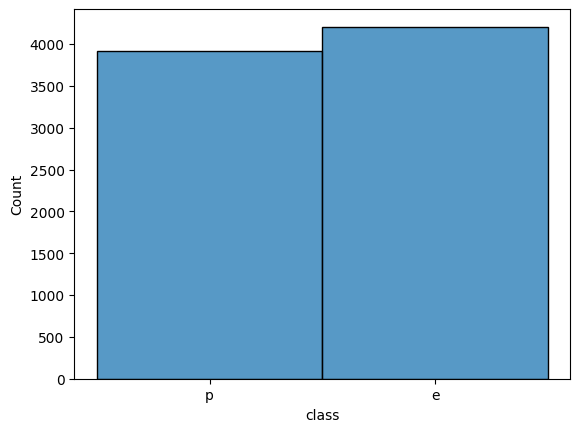

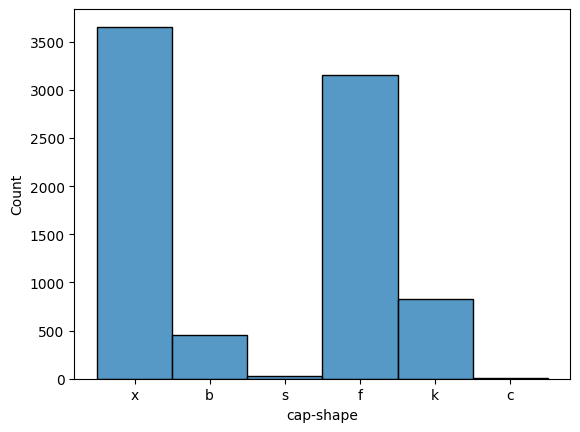

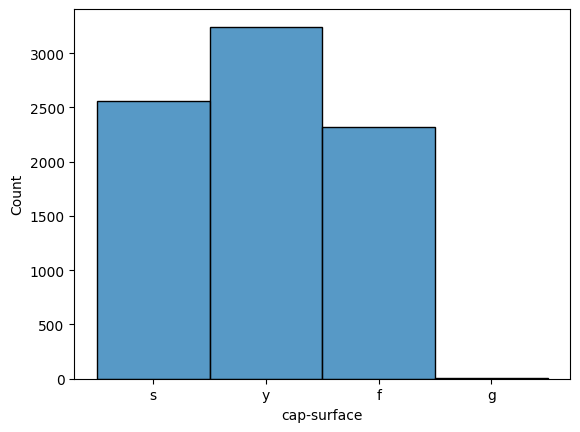

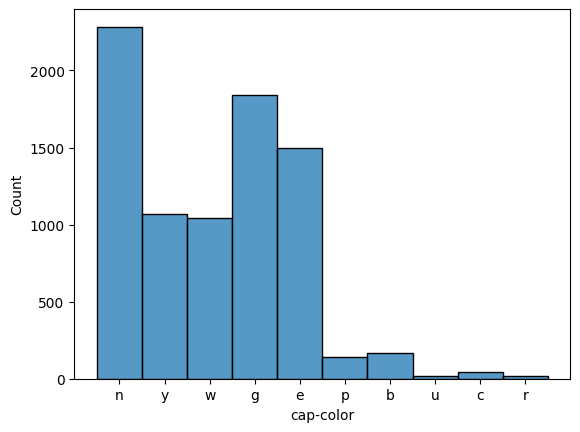

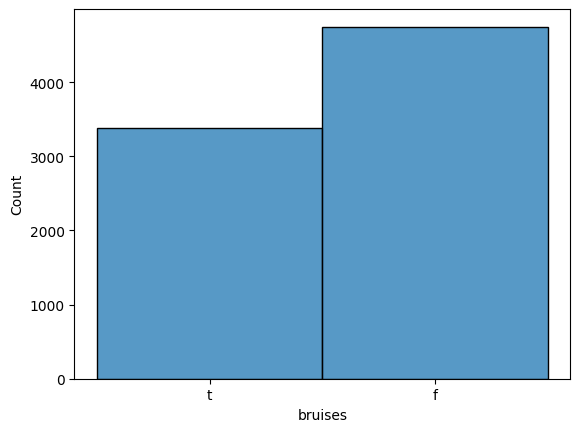

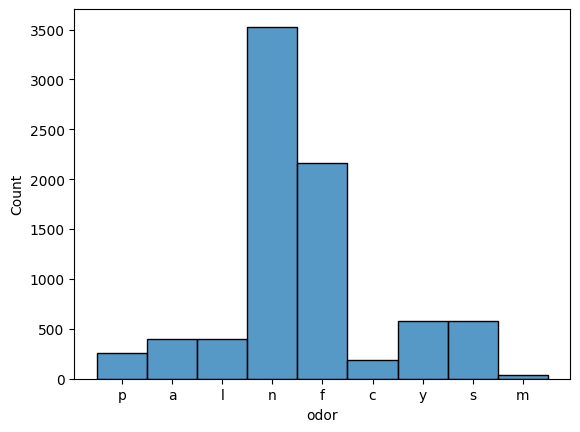

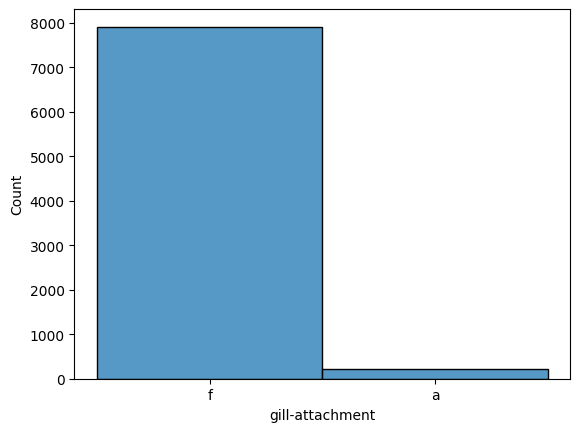

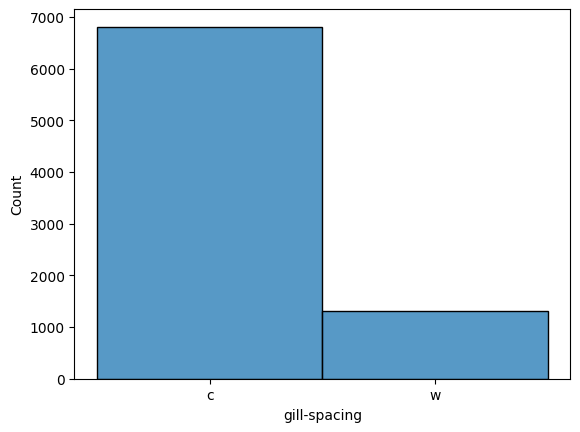

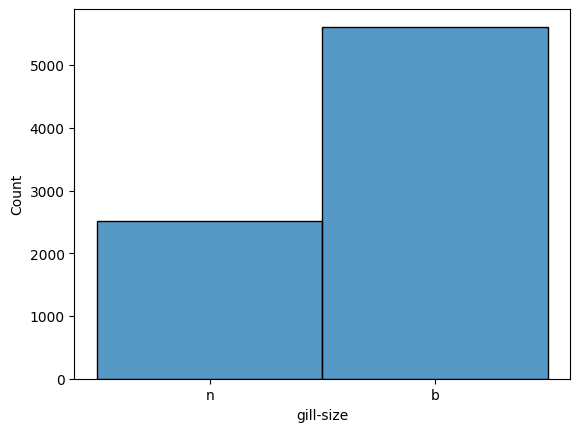

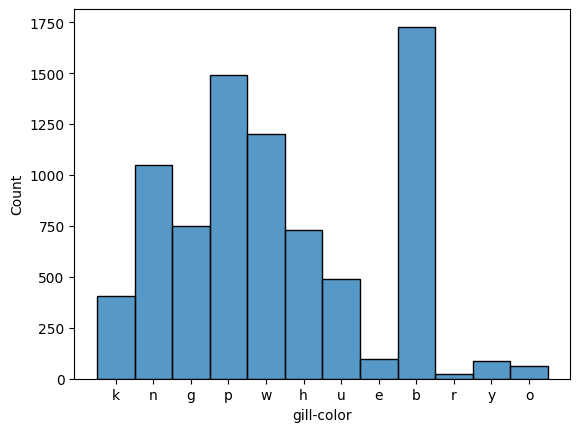

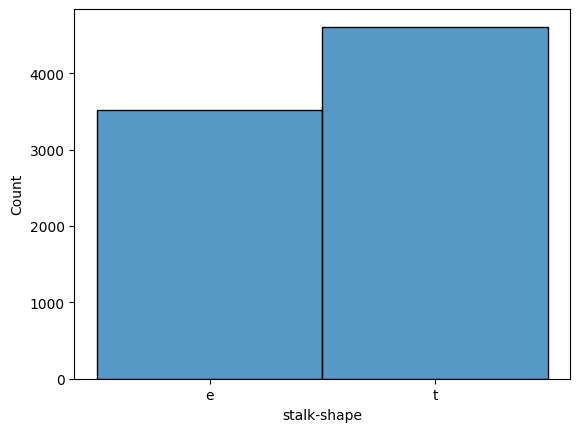

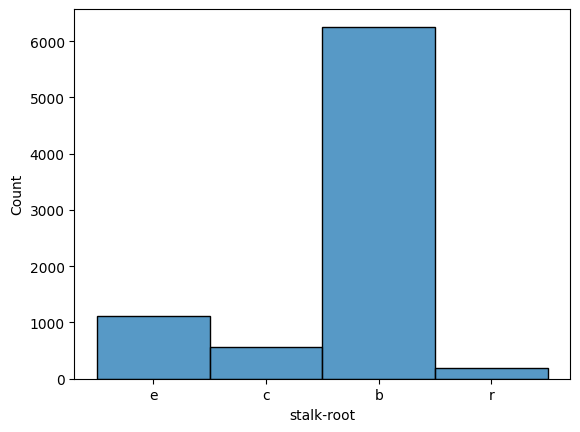

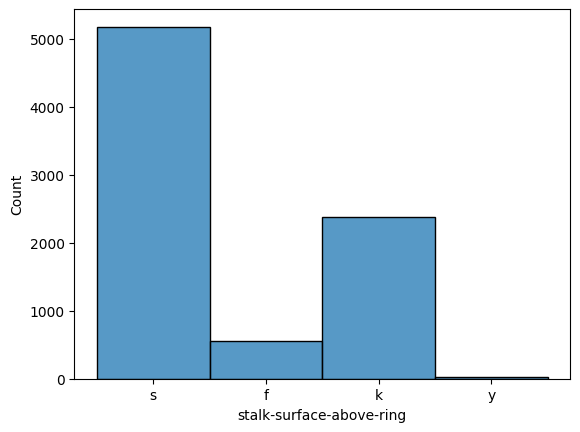

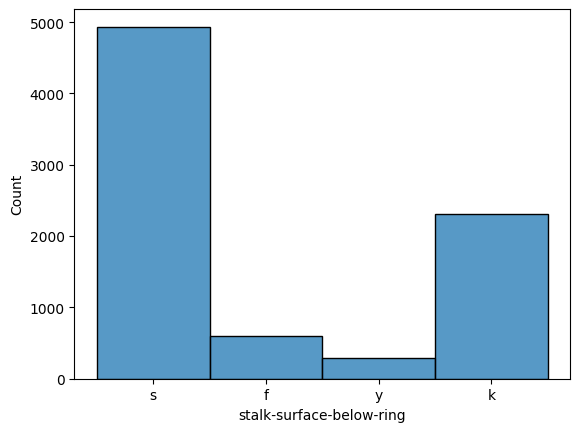

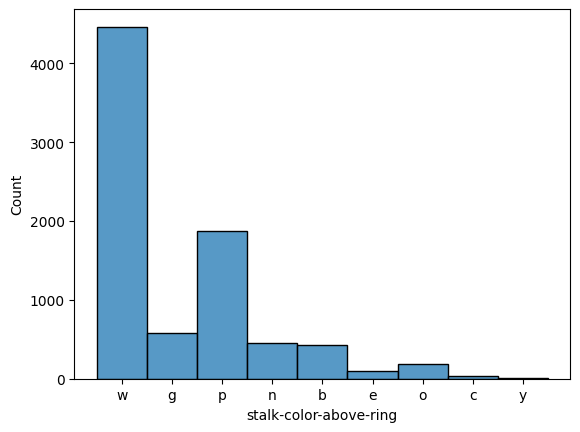

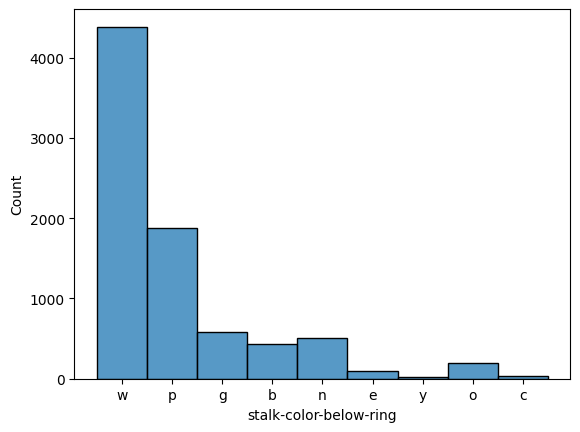

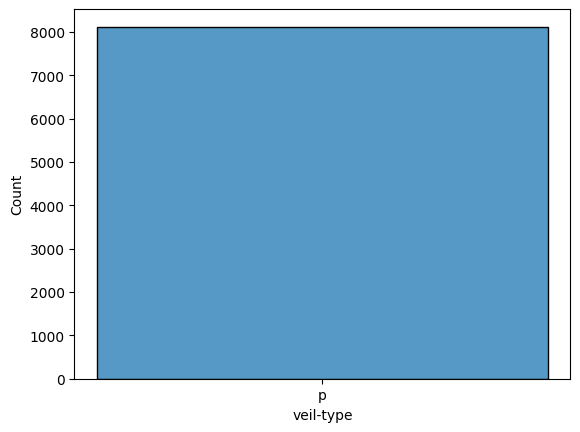

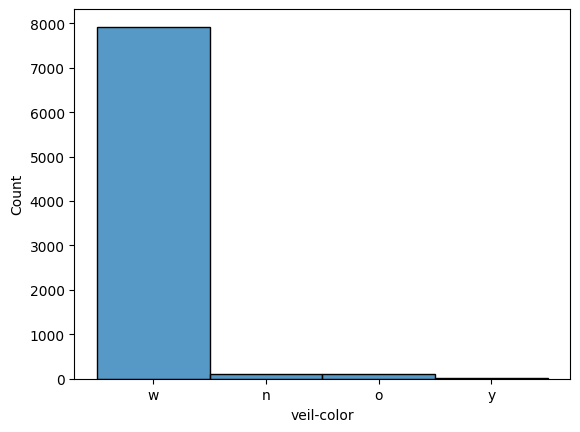

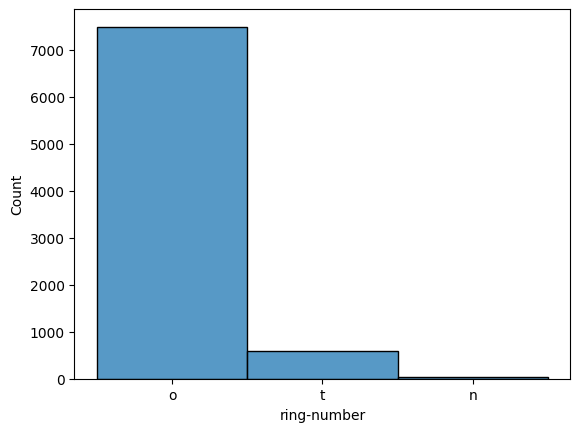

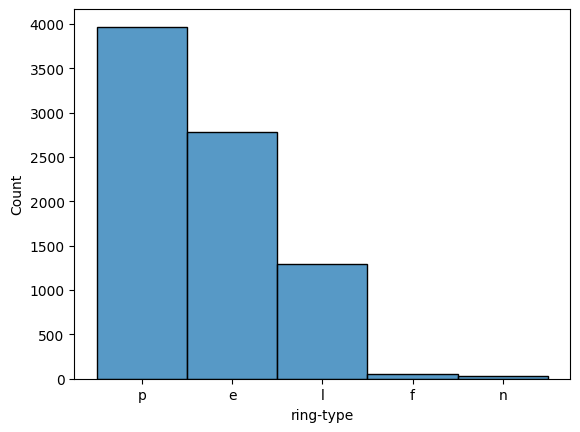

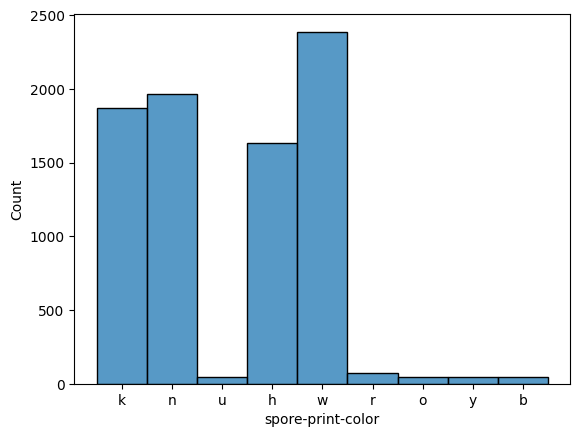

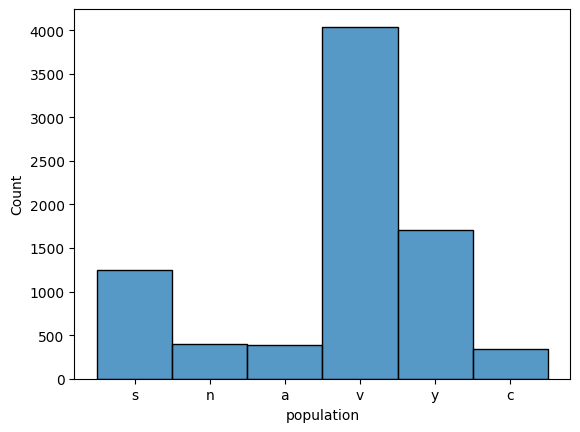

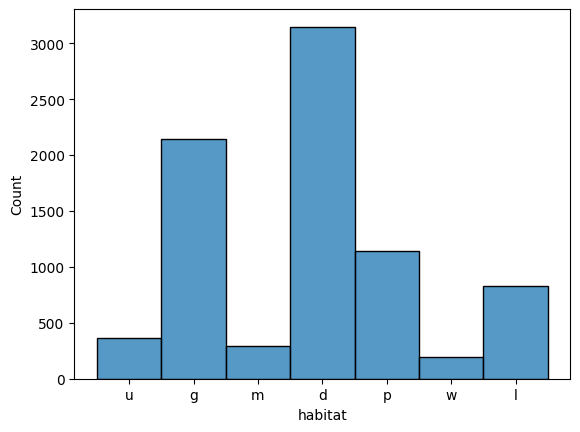

In [ ]:
#graficamos con histplot para ver la cantidad por nivel
for feature in features:
    sns.histplot(data=df_imputed[feature])
    plt.show()

Se elimina la variable 'veil-type'

In [15]:
df_imputed = df_imputed.drop('veil-type', axis=1)

#confirmamos el tamaño del nuevo df
print(df_imputed.shape)

(8124, 22)


#### Separación entre Variables Predictoras y Variables a Predecir

In [16]:
# La variable que trata de predecir este conjunto de datos es 'class'.
y = df_imputed['class']
X = df_imputed.drop('class', axis=1)

#confirmamos tamaños de la matriz X y el vector y
print(f'El tamaño de la matriz X es: {X.shape}. El tamaño del vector y es: {y.shape}')

El tamaño de la matriz X es: (8124, 21). El tamaño del vector y es: (8124,)


#### Codificar correctamente Variables Categóricas a Numéricas

In [ ]:
# One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

X_encoded = OneHotEncoder(drop='if_binary').fit_transform(X).toarray()

print(X_encoded)

print(X_encoded.shape)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(8124, 110)


Se muestra el X_encoded como un dataframe para poder visualizar mejor las columnas. Para ello, se usa el OneHotEncoder() como transformer y se accede al método get_features_names_out()

In [18]:
from sklearn.compose import ColumnTransformer

features_imputed = X.columns.tolist()
print(f'La lista de features es: {features_imputed} y la cantidad es {len(features_imputed)}.')

transformer = ColumnTransformer([('CatTrans', OneHotEncoder(drop='if_binary'), features_imputed)])

X_encoded = transformer.fit_transform(X).toarray()

X_encoded = pd.DataFrame(data=X_encoded, columns=transformer.get_feature_names_out())

print(X_encoded)

La lista de features es: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'] y la cantidad es 21.
      CatTrans__cap-shape_b  CatTrans__cap-shape_c  CatTrans__cap-shape_f  \
0                       0.0                    0.0                    0.0   
1                       0.0                    0.0                    0.0   
2                       1.0                    0.0                    0.0   
3                       0.0                    0.0                    0.0   
4                       0.0                    0.0                    0.0   
...                     ...                    ...                    ...   
8119                    0.0                    0.0                 

#### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)

print(f'ENTRENAMIENTO: El tamaño de la matriz X es: {X_train.shape}. El tamaño del vector y es: {y_train.shape}')
print(f'PRUEBA: El tamaño de la matriz X es: {X_test.shape}. El tamaño del vector y es: {y_test.shape}')

ENTRENAMIENTO: El tamaño de la matriz X es: (5443, 110). El tamaño del vector y es: (5443,)
PRUEBA: El tamaño de la matriz X es: (2681, 110). El tamaño del vector y es: (2681,)


## PCA

#### Primer Approach:

Se empieza primero con todas las dimensiones para hacer el gráfico de varianza acumulada. Se usan 110 componentes que equivaldría practicamente a no hacer PCA, pero ayudará a ver lo que contribuye cada componente a la varianza.

In [20]:
# indicamos el número de componentes que queremos que el PCA tome
# empecemos con todas las columnas para verlo mejor
n_components = 110

# instanciamos el objeto y lo transformamos con la data
pca = PCA(n_components=n_components) # metodo de sklearn

X_train_pca = pca.fit_transform(X_train)

X_train_pca.shape

(5443, 110)

Importante notar que el número de columnas equivale al número de componentes indicado al principio. Si hubieramos puesto 2 componentes, tendríamos ahora 2 columnas.

In [21]:
# explained_variance_ratio_:
# Percentage of variance explained by each of the selected components.
# If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0 (sacado de la docu).
var = pca.explained_variance_ratio_
print(var)
print(len(var))

[1.65977285e-01 1.18114223e-01 9.62573820e-02 5.56831343e-02
 4.08232867e-02 3.89436903e-02 3.41998610e-02 3.01253893e-02
 2.38497935e-02 2.31456991e-02 2.22584232e-02 2.07402212e-02
 1.96774570e-02 1.70610056e-02 1.63518678e-02 1.62187103e-02
 1.58404502e-02 1.53167582e-02 1.38760426e-02 1.25127874e-02
 1.22618206e-02 1.17704412e-02 1.07096834e-02 9.97082066e-03
 9.68924923e-03 9.09729622e-03 8.69974987e-03 8.30611362e-03
 8.14124050e-03 7.55521928e-03 6.96425581e-03 6.78985875e-03
 6.52273231e-03 5.87931721e-03 5.58308236e-03 5.20616097e-03
 5.06420761e-03 4.73475271e-03 4.61243049e-03 4.37903693e-03
 4.28381172e-03 3.89037282e-03 3.68200913e-03 3.64646956e-03
 3.12186621e-03 2.96084315e-03 2.72157526e-03 2.54644058e-03
 2.30191751e-03 2.13099800e-03 1.91761493e-03 1.76524621e-03
 1.63191311e-03 1.36673294e-03 1.26697123e-03 1.18611005e-03
 9.96430015e-04 9.11648539e-04 8.48796304e-04 7.69929279e-04
 7.23418752e-04 6.93596084e-04 6.62153644e-04 6.01134726e-04
 5.51285105e-04 5.285025

Este atributo **explained_variance_ratio_** permite saber el porcentaje de varianza explicado por cada componente. En el caso anterior, el primer componente describe el 16.6% de la varianza de los datos, el segundo componente describe el 11.8% y así sucesivamente... hasta el número de componentes especificados en el PCA.

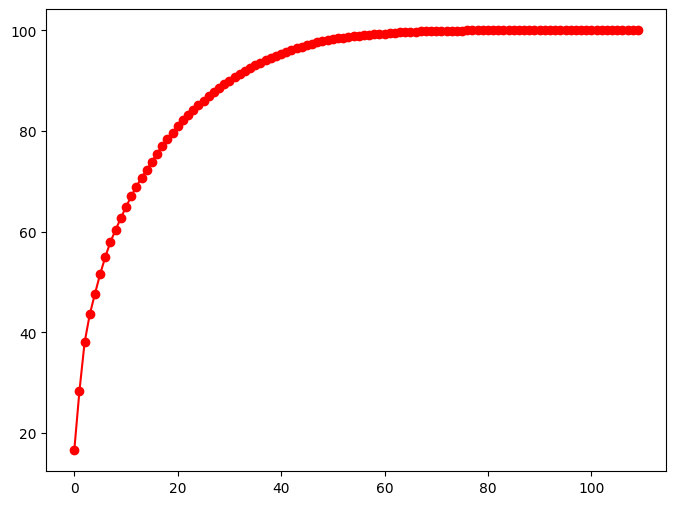

In [22]:
# graficamos la varianza acumulada para encontrar
# el punto óptimo entre número de componentes y 
# porcentaje de varianza acumulada explicada por eso componentes
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(8,6))
plt.plot(cum_var, 'r', marker='o');

Esto es súper interesante! Lo que dice es que, cuando se tiene un poco menos de 35 componentes, se describe el 90% de la varianza de los datos.

In [23]:
#creamos un dataframe del pca ya hecho para eliminar las columnas que
#no están contribuyendo significativamente a la varianza
X_train_pca_drop = pd.DataFrame(X_train_pca)

#seleccionamos las columnas de la 36 a la 110
drop_cols = X_train_pca_drop.columns[35:111]

#eliminamos las columnas
X_train_pca_drop.drop(columns=drop_cols, inplace=True)

#tenemos la reducción hecha
print(X_train_pca_drop.shape)

(5443, 35)


#### Segundo Approach:

Otra forma diferente de hacer una reducción de dimensionalidad sería la siguiente:

In [24]:
# especificamos el número de componentes que nos interesa, por ejemplo 35
n_components = 35

# instanciamos el objeto y lo transformamos con la data
pca_35 = PCA(n_components=n_components) # metodo de sklearn

X_train_pca_35 = pca_35.fit_transform(X_train)

print(X_train_pca_35.shape)

X_train_pca_35 = pd.DataFrame(X_train_pca_35)

(5443, 35)


Comparando el primer approach y el segundo approach, se observa que, aunque las dimensiones de los dataframes son las mismas, los dataframes son DIFERENTES, porque se han tomado RUTAS DIFERENTES.

In [25]:
if X_train_pca_35.equals(X_train_pca_drop):
    print('Son iguales.')
else:
    print('Son diferentes.')

Son diferentes.


Muy importante anotar que X_train_pca_drop contiene sólo un subconjunto de las columnas de X_train_pca. Es decir, primero aplicamos la reducción y luego nos quedamos con un subconjunto. Mientras que X_train_pca_35 representa las muestras originales en un espacio de menor dimensión (35 dimensiones en este caso). Por lo tanto, estos dos DataFrames son diferentes debido a las diferentes operaciones que se han aplicado a los datos originales.

#### Tercer Approach:

In [26]:
#instanciamos una vez más el PCA
pca_var = PCA()

pca_var.fit(X_train)

cumsum = np.cumsum(pca_var.explained_variance_ratio_)

d = np.argmax(cumsum >= 0.90) + 1

X_train_pca_var = PCA(n_components=d).fit_transform(X_train)

print(X_train_pca_var.shape)


(5443, 31)


PCA() permite pasar directamente un float como parámetro de n_components. De esta forma, automáticamente se selecciona el número de componentes que explica el porcentaje de la varianza que hemos pasado como argumento.

Documentación:
If 0 < n_components < 1 and svd_solver == 'full', select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.

In [27]:
pca_var_arg = PCA(n_components=0.9)

X_train_pca_var_arg = pca_var_arg.fit_transform(X_train)

print(X_train_pca_var_arg.shape)

(5443, 31)


Este último approach puede ser interesante cuando se tiene un conjunto de datos MUY GRANDE y es costoso meter el n_components en un bucle for y probarlos todos para hallar el óptimo.

---

Prueba rápida: se aplica PCA para hacer la reducción en 2 dimensiones y graficar.

El tamaño de la X reducida es: (5443, 2)


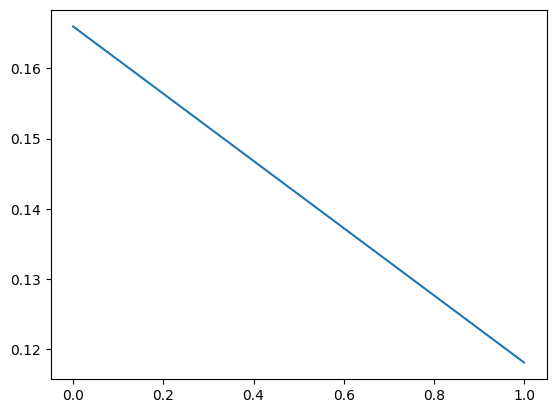

In [28]:
pca = PCA(n_components=2)

X_reduced = pca.fit_transform(X_train)

print(f'El tamaño de la X reducida es: {X_reduced.shape}')

#graficamos para ver qué tanto peso tienen los componentes
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_);

Aquí vemos que la primera componente explica más del 16% y la segunda más del 11% que es lo mismo que vimos anteriormente.

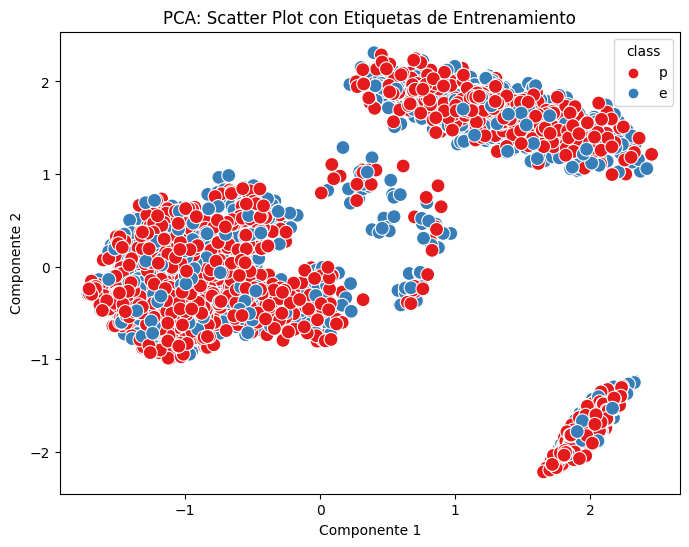

In [29]:
# Representar en un scatterplot y poner en color las etiquetas de entrenamiento
df_X_reduced = pd.DataFrame(data=X_reduced, columns=['Componente 1', 'Componente 2'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Componente 1', y='Componente 2', hue=y, data=df_X_reduced, palette='Set1', s=100, edgecolor='w')
plt.title('PCA: Scatter Plot con Etiquetas de Entrenamiento');

Parece que está bastante separado y diferenciado incluso a simple vista

Igualmente, antes de continuar, se hace una prueba rápida con un clasificador para tener unas primeras métricas

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# 1. Definir el clasificador y el número de estimadores
rf = RandomForestClassifier(n_estimators=7, random_state=42)

# 2. Entrenar en train
rf.fit(X_reduced, y_train)

# 3. Calcular la precisión sobre train
y_train_predicted = rf.predict(X_reduced)

In [31]:
def eval_metrics(y_true, y_predicted):
    acc = accuracy_score(y_true, y_predicted)
    conf_matrix = confusion_matrix(y_true, y_predicted)
    precision = precision_score(y_true, y_predicted, pos_label='e')
    recall = recall_score(y_true, y_predicted, pos_label='e')
    f1 = f1_score(y_true, y_predicted, pos_label='e')

    score_dic = {'Accuracy': acc, 'Confusion Matrix': conf_matrix, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

    return score_dic

In [32]:
eval_metrics(y_train, y_train_predicted)

{'Accuracy': 0.9930185559434136,
 'Confusion Matrix': array([[2822,    8],
        [  30, 2583]], dtype=int64),
 'Precision': 0.9894810659186536,
 'Recall': 0.9971731448763251,
 'F1-Score': 0.9933122140091517}

In [33]:
# 4. Calcular la precisión sobre test
X_test_reduced = pca.transform(X_test)

y_test_predicted = rf.predict(X_test_reduced)

print(y_test_predicted)

['e' 'p' 'p' ... 'e' 'e' 'e']


In [34]:
eval_metrics(y_test, y_test_predicted)

{'Accuracy': 0.9190600522193212,
 'Confusion Matrix': array([[1296,   82],
        [ 135, 1168]], dtype=int64),
 'Precision': 0.9056603773584906,
 'Recall': 0.9404934687953556,
 'F1-Score': 0.9227483090067639}

Funciona bastante bien con 2 componentes, pero quizás es posible mejorar las métricas, volviendo al dataset original y aplicando PCA nuevamente con un mayor número de componentes. Incluso es posible calcular las métricas de clasificación tomando de 1 a 110 componentes y compararlas.

In [35]:
X_train.shape

(5443, 110)

In [36]:
n_features = range(1, 111, 1) # definir un rango de valores a probar
scores = []
scores_precision = []

for n in n_features:

    scores_dic = {}

    # Hacer PCA sobre X_train
    # 1. Definir PCA
    pca = PCA(n_components=n)

    # 2. Aprender PCA sobre X_train
    X_train_reduced = pca.fit_transform(X_train)

    # Entrenar Random Forest
    # 1. Definir el RF
    rf = RandomForestClassifier(n_estimators=7, random_state=42)
    
    # 2. Entrenar clasificador
    rf.fit(X_train_reduced, y_train)

    # Evaluamos en test
    X_test_reduced = pca.transform(X_test)

    y_test_predicted = rf.predict(X_test_reduced)

    # Guardar el score
    scores_dic = eval_metrics(y_test, y_test_predicted)

    scores_dic['n_components'] = n

    scores.append(scores_dic)

    scores_precision.append(scores_dic.get('Precision'))

print(scores)
print(scores_precision)

[{'Accuracy': 0.8362551286833271, 'Confusion Matrix': array([[1172,  206],
       [ 233, 1070]], dtype=int64), 'Precision': 0.8341637010676156, 'Recall': 0.8505079825834543, 'F1-Score': 0.8422565576715775, 'n_components': 1}, {'Accuracy': 0.9186870570682582, 'Confusion Matrix': array([[1294,   84],
       [ 134, 1169]], dtype=int64), 'Precision': 0.9061624649859944, 'Recall': 0.9390420899854862, 'F1-Score': 0.9223093371347114, 'n_components': 2}, {'Accuracy': 0.9832152182021634, 'Confusion Matrix': array([[1354,   24],
       [  21, 1282]], dtype=int64), 'Precision': 0.9847272727272727, 'Recall': 0.9825834542815675, 'F1-Score': 0.9836541954231747, 'n_components': 3}, {'Accuracy': 0.9895561357702349, 'Confusion Matrix': array([[1366,   12],
       [  16, 1287]], dtype=int64), 'Precision': 0.9884225759768451, 'Recall': 0.9912917271407837, 'F1-Score': 0.9898550724637681, 'n_components': 4}, {'Accuracy': 0.9951510630361805, 'Confusion Matrix': array([[1371,    7],
       [   6, 1297]], dty

<AxesSubplot:>

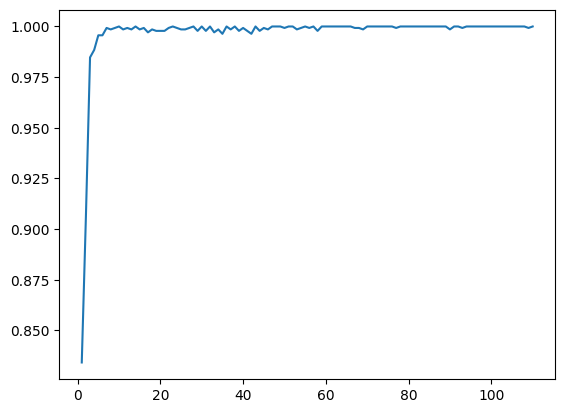

In [37]:
sns.lineplot(x=n_features, y=scores_precision)

En la gráfica se puede ver que a partir de unas 10 features ya se tiene el score esperado y se puede reducir el dataset a un 10% del original.

Tomando **7 componentes**:

In [38]:
# Hacer PCA sobre X_train
# 1. Definir PCA
pca = PCA(n_components=7)

# 2. Aprender PCA sobre X_train
X_train_reduced = pca.fit_transform(X_train)

# Entrenar Random Forest
# 1. Definir el RF
rf = RandomForestClassifier(n_estimators=7, random_state=42)

# 2. Entrenar clasificador
rf.fit(X_train_reduced, y_train)

# Evaluamos en test
X_test_reduced = pca.transform(X_test)

y_test_predicted = rf.predict(X_test_reduced)

# Guardar el score
scores_dic = eval_metrics(y_test, y_test_predicted)

print(scores_dic)

{'Accuracy': 0.9985080193957478, 'Confusion Matrix': array([[1375,    3],
       [   1, 1302]], dtype=int64), 'Precision': 0.9992732558139535, 'Recall': 0.997822931785196, 'F1-Score': 0.9985475671750181}


## Clustering

Ahora, se puede intentar hacer algo de clustering para ver qué información se puede obtener.

El primer paso va a ser importar la función de Kmeans de sklearn, y a partir de ahi, buscar el valor óptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gráfica que representa el total de las distancias de los puntos a los centros de los clusters asociados.

**Documentación:**

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que generar los modelos de kmeans, evaluar y presentar la gráfica para los valores de ``k`` establecidos.




Primero, se define el número óptimo de clusters (valor de k), mirando el codo (especie de vértice) de la gráfica obtenida.

**Documentación:** 
**inertia_:** Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided (attribute is a float).

<AxesSubplot:>

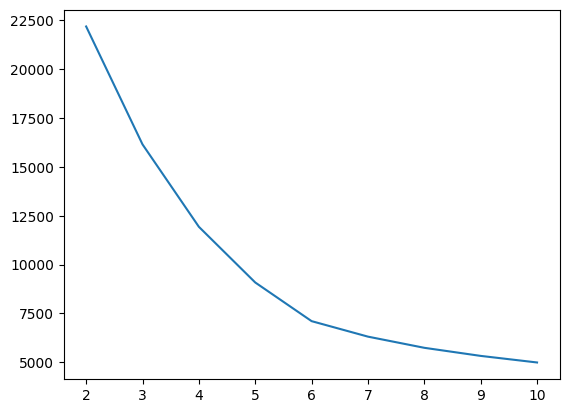

In [73]:
from sklearn.cluster import KMeans

scores = []
k_values = range(2, 11, 1) # definir un rango

for a in k_values:
    
    # Definir Kmeans y ajustar
    kmeans = KMeans(n_clusters=a, random_state=42) 
    kmeans.fit_predict(X_train_reduced)
    scores.append(kmeans.inertia_)
    
sns.lineplot(x=k_values, y=scores)

Según el gráfico el vertice estaría en aproximadamente **k = 5**.

---

### Otros Métodos para Identificar el Número de Clusters

**Selecting the Number of Clusters with Silhouette Analysis on KMeans Clustering:** Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

For n_clusters = 3 The average silhouette_score is : 0.3848701216147906
For n_clusters = 4 The average silhouette_score is : 0.41524772160599466
For n_clusters = 5 The average silhouette_score is : 0.46461485662580243
For n_clusters = 6 The average silhouette_score is : 0.5049727844458886
For n_clusters = 7 The average silhouette_score is : 0.48825491736737314
For n_clusters = 8 The average silhouette_score is : 0.47313763133658054


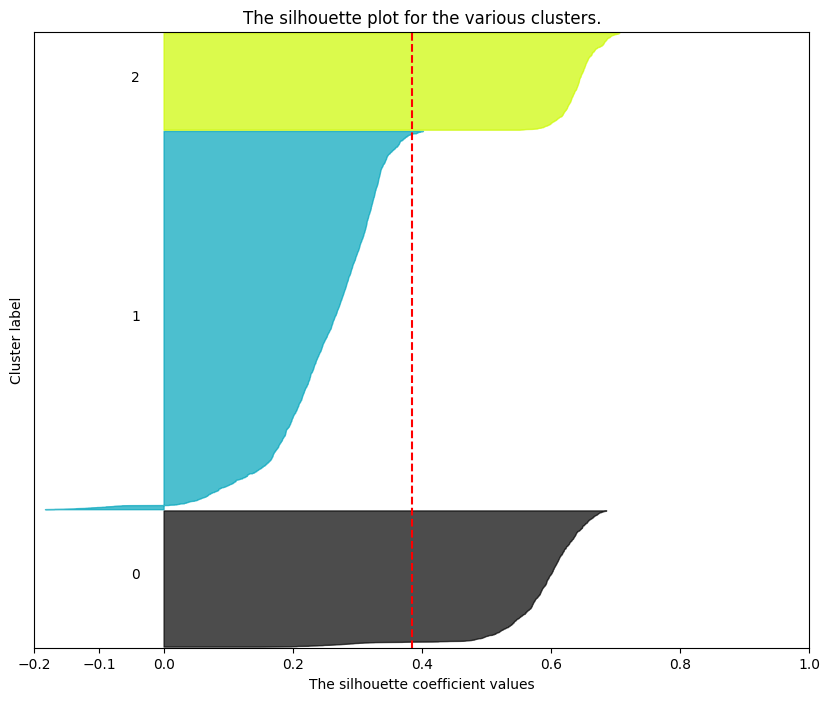

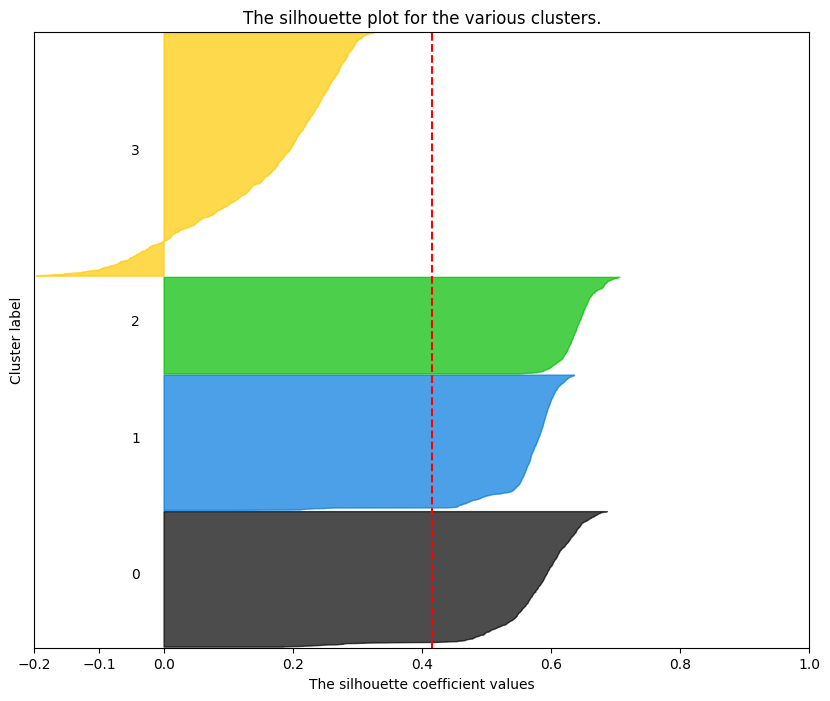

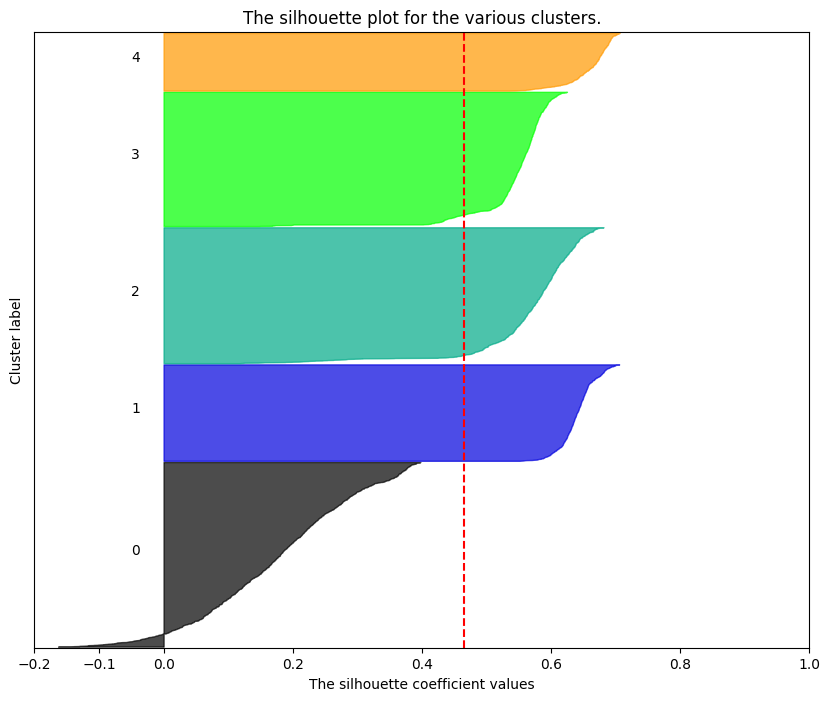

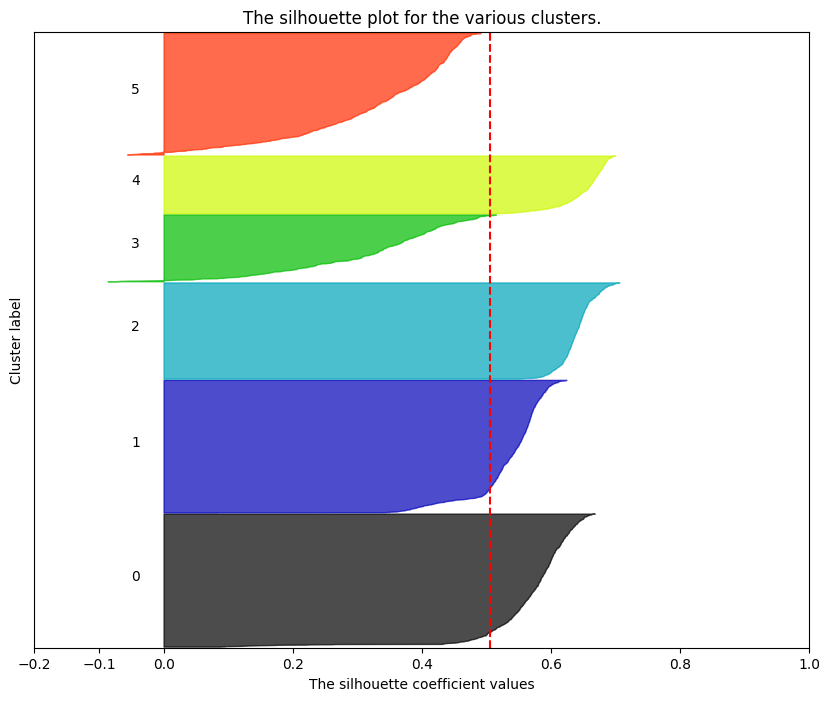

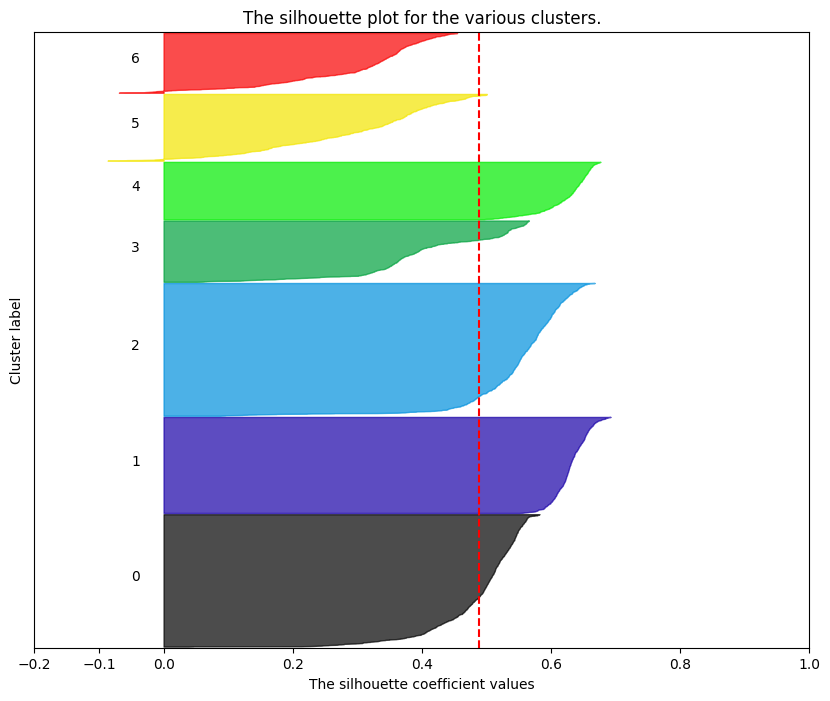

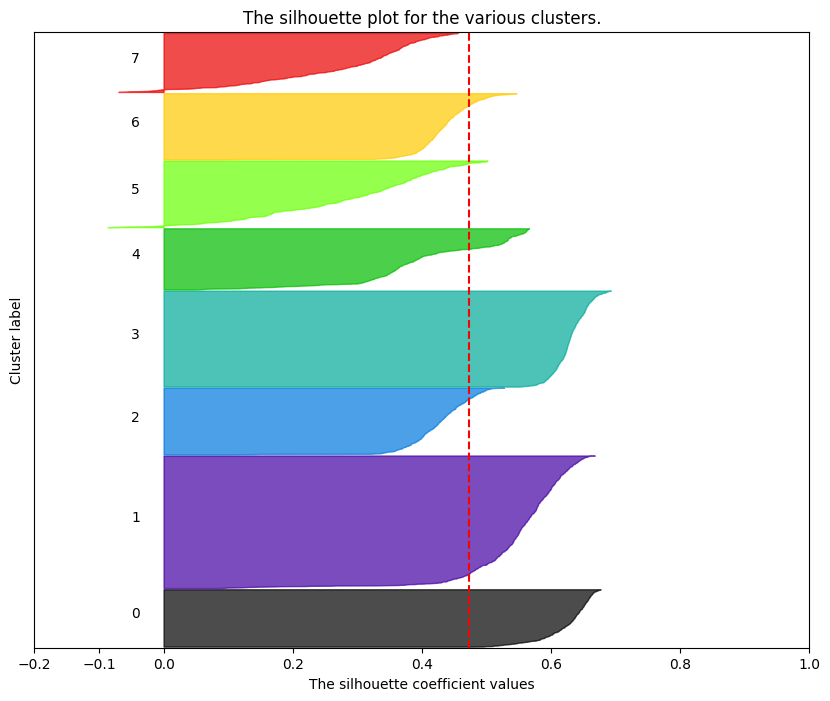

In [83]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:

    fig, ax1 = plt.subplots(figsize=(10,8))

    # Silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this case all
    # lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train_reduced) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 42 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_train_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_reduced, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

Cuando se realiza un análisis de silueta y se espera elegir el número óptimo de clusters, interesa que:
- Los clusters estén por encima del average silhouette score (línea roja punteada) y que sean más o menos uniformes entre sí. Es decir, que el tamaño de las montañitas sea más o menos similar.

En este caso, el análisis está un poco complicado porque ninguna gráfica cumple con ambas características al 100%, pero **k=5** parece medianamente bien.

---

Con el valor obtenido de las gráficas y análisis de k, se puede obtener una buena aproximación de Kmeans y con ello pasar a explorar cómo de bien han separado la información los distintos clusters.

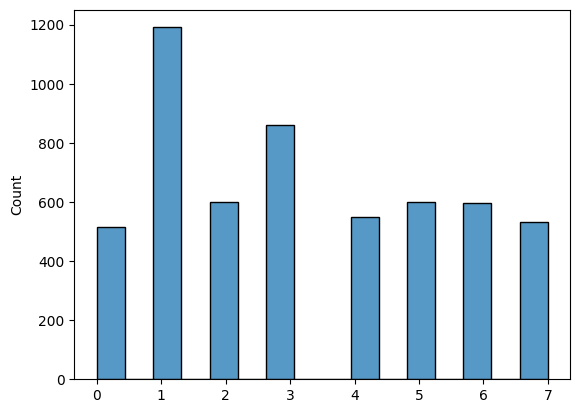

In [ ]:
# Aprender Kmeans con el valor de K obtenido.
k_best = 5

kmeans = KMeans(n_clusters=k_best, random_state=42) # Definir y entrenar Kmeans.
clusters_labels = kmeans.fit_predict(X_train_reduced)

sns.histplot(cluster_labels);